## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  35.576732   569.302572  0.121679  1.482494  1.353182
1  25.420857  1038.774607  0.197053  8.092580  1.526934
2  38.281252  1324.451290  0.316909  6.725729  1.511867
3  82.523951   465.026902  0.565271  4.946299  1.232950
4  42.528827   635.701892  0.942167  5.085801  1.347645


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0124534	total: 57.7ms	remaining: 57.7s
1:	learn: 1.0021078	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9959284	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9869508	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9778435	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9682888	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9587137	total: 60.7ms	remaining: 8.61s
7:	learn: 0.9479367	total: 61.2ms	remaining: 7.59s
8:	learn: 0.9400178	total: 61.7ms	remaining: 6.79s
9:	learn: 0.9315161	total: 62.2ms	remaining: 6.16s
10:	learn: 0.9229333	total: 62.6ms	remaining: 5.63s
11:	learn: 0.9146041	total: 63ms	remaining: 5.19s
12:	learn: 0.9066041	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8981776	total: 64ms	remaining: 4.51s
14:	learn: 0.8898041	total: 64.5ms	remaining: 4.23s
15:	learn: 0.8825348	total: 64.9ms	remaining: 3.99s
16:	learn: 0.8736150	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8668645	total: 65.7ms	remaining: 3.59s
18:	learn: 0.8605410	total: 66.1ms	remaining: 3.

134:	learn: 0.3675653	total: 116ms	remaining: 742ms
135:	learn: 0.3655837	total: 116ms	remaining: 740ms
136:	learn: 0.3638584	total: 117ms	remaining: 737ms
137:	learn: 0.3619028	total: 118ms	remaining: 734ms
138:	learn: 0.3606869	total: 118ms	remaining: 731ms
139:	learn: 0.3589826	total: 118ms	remaining: 727ms
140:	learn: 0.3575386	total: 119ms	remaining: 723ms
141:	learn: 0.3552184	total: 119ms	remaining: 719ms
142:	learn: 0.3534627	total: 119ms	remaining: 715ms
143:	learn: 0.3516930	total: 120ms	remaining: 712ms
144:	learn: 0.3497720	total: 120ms	remaining: 708ms
145:	learn: 0.3481972	total: 120ms	remaining: 704ms
146:	learn: 0.3461737	total: 121ms	remaining: 700ms
147:	learn: 0.3442410	total: 121ms	remaining: 697ms
148:	learn: 0.3423356	total: 121ms	remaining: 694ms
149:	learn: 0.3399131	total: 122ms	remaining: 691ms
150:	learn: 0.3382015	total: 122ms	remaining: 688ms
151:	learn: 0.3360699	total: 123ms	remaining: 685ms
152:	learn: 0.3343672	total: 123ms	remaining: 683ms
153:	learn: 

297:	learn: 0.2006343	total: 184ms	remaining: 435ms
298:	learn: 0.2004156	total: 185ms	remaining: 434ms
299:	learn: 0.2001987	total: 185ms	remaining: 433ms
300:	learn: 0.1999419	total: 186ms	remaining: 432ms
301:	learn: 0.1997515	total: 186ms	remaining: 431ms
302:	learn: 0.1995429	total: 187ms	remaining: 430ms
303:	learn: 0.1991600	total: 187ms	remaining: 428ms
304:	learn: 0.1989776	total: 187ms	remaining: 427ms
305:	learn: 0.1987632	total: 188ms	remaining: 426ms
306:	learn: 0.1985177	total: 188ms	remaining: 425ms
307:	learn: 0.1983082	total: 189ms	remaining: 424ms
308:	learn: 0.1973604	total: 189ms	remaining: 423ms
309:	learn: 0.1971812	total: 190ms	remaining: 423ms
310:	learn: 0.1968249	total: 190ms	remaining: 422ms
311:	learn: 0.1966240	total: 191ms	remaining: 421ms
312:	learn: 0.1963115	total: 191ms	remaining: 420ms
313:	learn: 0.1961278	total: 192ms	remaining: 419ms
314:	learn: 0.1959344	total: 192ms	remaining: 418ms
315:	learn: 0.1954990	total: 193ms	remaining: 417ms
316:	learn: 

547:	learn: 0.1057049	total: 297ms	remaining: 245ms
548:	learn: 0.1053213	total: 298ms	remaining: 245ms
549:	learn: 0.1049279	total: 298ms	remaining: 244ms
550:	learn: 0.1047492	total: 299ms	remaining: 243ms
551:	learn: 0.1043646	total: 299ms	remaining: 243ms
552:	learn: 0.1041724	total: 300ms	remaining: 242ms
553:	learn: 0.1039831	total: 300ms	remaining: 242ms
554:	learn: 0.1037714	total: 300ms	remaining: 241ms
555:	learn: 0.1033955	total: 301ms	remaining: 240ms
556:	learn: 0.1032114	total: 301ms	remaining: 240ms
557:	learn: 0.1030300	total: 302ms	remaining: 239ms
558:	learn: 0.1028515	total: 302ms	remaining: 238ms
559:	learn: 0.1024358	total: 303ms	remaining: 238ms
560:	learn: 0.1022345	total: 303ms	remaining: 237ms
561:	learn: 0.1018781	total: 303ms	remaining: 237ms
562:	learn: 0.1017052	total: 304ms	remaining: 236ms
563:	learn: 0.1013559	total: 304ms	remaining: 235ms
564:	learn: 0.1010134	total: 305ms	remaining: 235ms
565:	learn: 0.1006309	total: 305ms	remaining: 234ms
566:	learn: 

696:	learn: 0.0663777	total: 366ms	remaining: 159ms
697:	learn: 0.0661804	total: 366ms	remaining: 158ms
698:	learn: 0.0659188	total: 367ms	remaining: 158ms
699:	learn: 0.0657435	total: 368ms	remaining: 158ms
700:	learn: 0.0654936	total: 368ms	remaining: 157ms
701:	learn: 0.0653124	total: 369ms	remaining: 156ms
702:	learn: 0.0649834	total: 369ms	remaining: 156ms
703:	learn: 0.0648066	total: 369ms	remaining: 155ms
704:	learn: 0.0646245	total: 370ms	remaining: 155ms
705:	learn: 0.0644562	total: 370ms	remaining: 154ms
706:	learn: 0.0642051	total: 371ms	remaining: 154ms
707:	learn: 0.0640104	total: 371ms	remaining: 153ms
708:	learn: 0.0637821	total: 372ms	remaining: 153ms
709:	learn: 0.0637225	total: 372ms	remaining: 152ms
710:	learn: 0.0634977	total: 372ms	remaining: 151ms
711:	learn: 0.0634270	total: 373ms	remaining: 151ms
712:	learn: 0.0632142	total: 373ms	remaining: 150ms
713:	learn: 0.0631557	total: 374ms	remaining: 150ms
714:	learn: 0.0630981	total: 374ms	remaining: 149ms
715:	learn: 

944:	learn: 0.0359459	total: 479ms	remaining: 27.9ms
945:	learn: 0.0358836	total: 480ms	remaining: 27.4ms
946:	learn: 0.0357832	total: 480ms	remaining: 26.9ms
947:	learn: 0.0356678	total: 480ms	remaining: 26.4ms
948:	learn: 0.0356071	total: 481ms	remaining: 25.8ms
949:	learn: 0.0355449	total: 481ms	remaining: 25.3ms
950:	learn: 0.0354673	total: 482ms	remaining: 24.8ms
951:	learn: 0.0354094	total: 483ms	remaining: 24.3ms
952:	learn: 0.0353332	total: 483ms	remaining: 23.8ms
953:	learn: 0.0352767	total: 483ms	remaining: 23.3ms
954:	learn: 0.0352021	total: 484ms	remaining: 22.8ms
955:	learn: 0.0351439	total: 484ms	remaining: 22.3ms
956:	learn: 0.0350454	total: 485ms	remaining: 21.8ms
957:	learn: 0.0349728	total: 485ms	remaining: 21.3ms
958:	learn: 0.0348943	total: 486ms	remaining: 20.8ms
959:	learn: 0.0348401	total: 486ms	remaining: 20.3ms
960:	learn: 0.0347434	total: 487ms	remaining: 19.7ms
961:	learn: 0.0346723	total: 487ms	remaining: 19.2ms
962:	learn: 0.0345953	total: 487ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


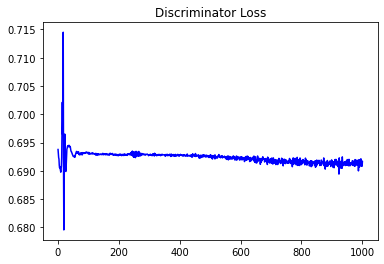

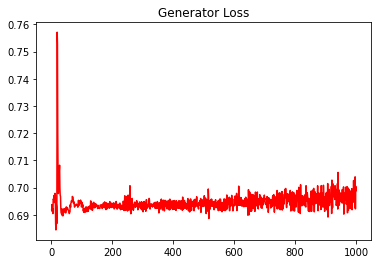

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4179562766951679


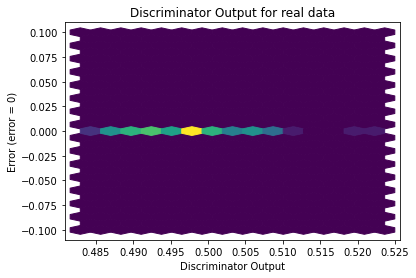

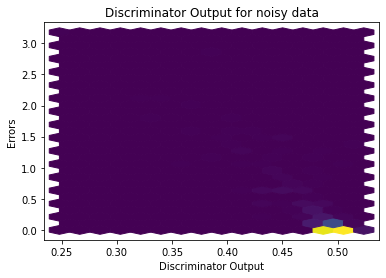

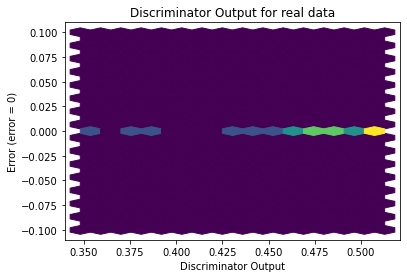

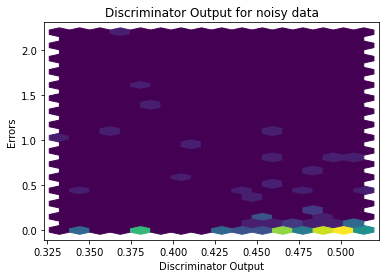

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5040]], requires_grad=True)
